In [ ]:
## jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

### Reading the dataset


In [2]:
df = pd.read_csv("spam_ham_dataset.csv")

## Data exploration

In [3]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [6]:
df.isna().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [7]:
df.shape,df.ndim

((5171, 4), 2)

In [8]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [9]:
df["label_num"].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

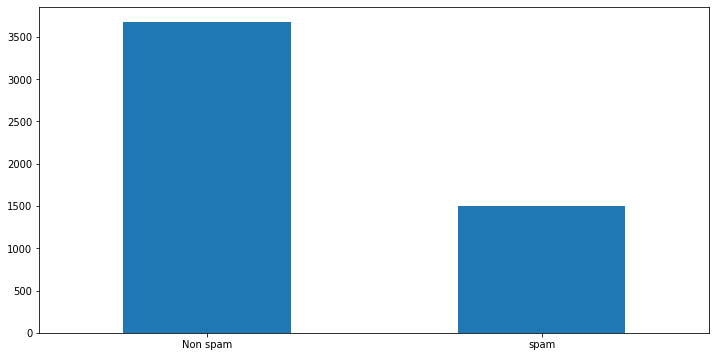

In [10]:
df["label_num"].value_counts().plot(kind="bar",figsize=(12,6))
plt.xticks(np.arange(2), ('Non spam', 'spam'),rotation=0);

# Cleaning the Text

In [11]:
length = len(df)
length

5171

In [12]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [13]:
import re
corpus = []
for i in range(0,length):
    text = re.sub("[^a-zA-Z]"," ",df["text"][i])
    text = text.lower()
    text = text.split()
    pe = PorterStemmer()
    stopword = stopwords.words("english")
    text = [pe.stem(word) for word in text if not word in set(stopword)]
    text = " ".join(text)
    corpus.append(text)
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=35000)
X = cv.fit_transform(corpus).toarray()

In [15]:
X.shape

(5171, 35000)

In [17]:
import pickle
pickle.dump(cv, open('cv.pkl', 'wb'))

In [18]:
y = df["label_num"].values
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [19]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [20]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

In [21]:
y_pred=model.predict(X_test)

In [22]:
y_pred[:20],y_test[:20]

(array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       dtype=int64),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       dtype=int64))

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm,score*100)

[[721  11]
 [ 19 284]] 97.10144927536231


In [24]:
import pickle

# Save trained model to file
pickle.dump(model, open("spam.pkl", "wb"))

In [25]:
loaded_model = pickle.load(open("spam.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.9710144927536232

In [28]:
def new_review(new_review):
    new_review = new_review
    new_review = re.sub('[^a-zA-Z]', ' ', new_review)
    new_review = new_review.lower()
    new_review = new_review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
    new_review = ' '.join(new_review)
    new_corpus = [new_review]
    new_X_test = cv.transform(new_corpus).toarray()
    new_y_pred = loaded_model.predict(new_X_test)
    return new_y_pred

new_review = new_review(str(input("Enter new review...")))
if new_review[0]==1:
    print("SPAM")
else :
    print("NOT SPAM")

Enter new review...IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.
SPAM


Testing Examples :
NOT SPAM :
```
Hi Scott,
Thanks for the e-mail.　 It is always nice to hear from people, especially
from you, Scott.

I have not got any reply, a positive or negative one, from Seibido yet.
Let's wait and hope that it will make a BOOK.

Have you finished your paperwork for Kaken and writing academic articles?
If you have some free time in the near future, I want to meet you and
explain to you our next project.　

Why not drink out in Hiroshima if we are accepted?
We need to celebrate ourselves, don't we?　
Let's have a small end-of-the-year party!
```
SPAM :
```
What's New In August 2020 [News & Updates]
```